 # Homework #4
 
 By 👦Franklin Marsh👦
 
 MATH0154 Computational Statistics
 
 with Dr. 😂Gabe Chandler😂.

 # Problem 1

Consider drawing data from a mixture distribution of two normals, one with $\mu=7$ and one with $\mu=10$, both having $\sigma^2=.5$.  The observation is drawn from the first normal with probability $\delta$.  Thus, 
$$f(x)=\delta f(x|7, .5^2) + (1-\delta)f(x|10, .5^2)$$
where the RHS functions are normal pdfs. [5pt]

 ## a)
a.  Write a function that samples from this distribution (so it will call $\delta$ as an argument).\\[5pt]


In [11]:
Draw <- function(n, delta) {
    
    out <- c()
    
    for (i in (1:n)) {
        
        if (runif(1) < delta) { #if a random uniform is less than delta
            out[i] <- rnorm(1,7,0.25) 
        }
    
        else {
            out[i] <- rnorm(1,10,0.25) 
        }
        }
    return(out)
}

 ## b)
b.  Let $\delta=.7$.  Sample $n=100$ observations from this distribution and present a histogram.\\[5pt]

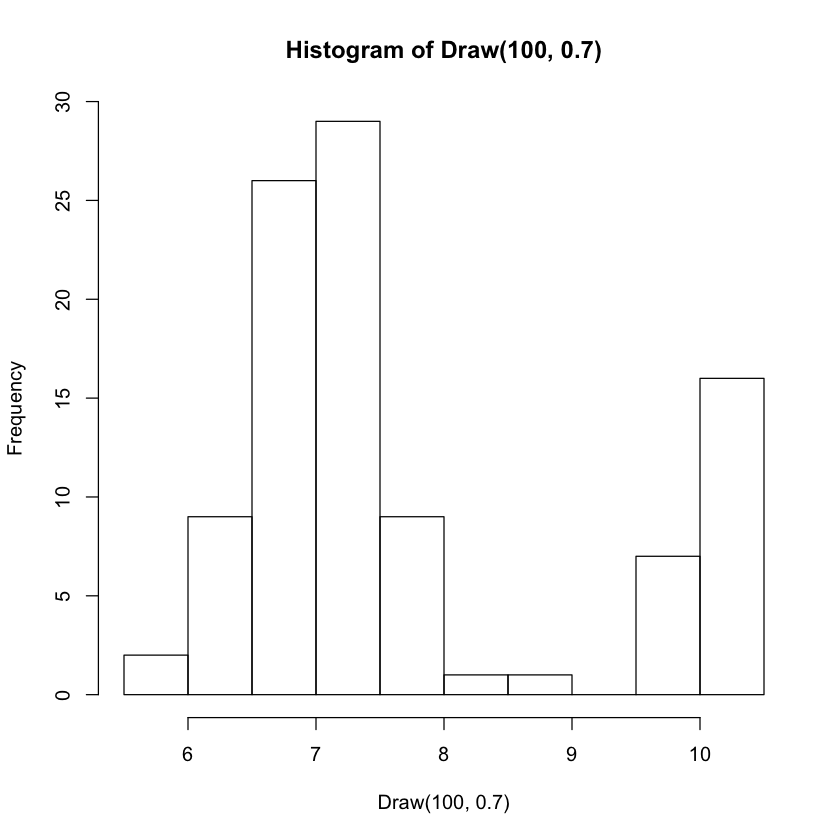

In [10]:
hist(Draw(100,0.7))

 ## c)

c. Consider a Bayesian analysis and find the posterior distribution of $\delta$ given that the prior distribution on $\delta$ is uniform (a so-called non-informative prior).  Plot a function that is proportional to the posterior distribution (the best you are going to be able to do)

 ## d)
 
d.  One estimate that is often used as a point estimate is the posterior mean.  Use an independence chain Metropolis Hastings algorithm to sample from the posterior and return an estimate using a candidate distribution that is uniform over the support (i.e. the candidate distribution is the same as the prior, which is often a good idea without other information).  Return the estimate of the posterior mean, and create plots that asses the 'mixing' of the chain (how quickly the chain explores the space). Use a starting value far from the true $\delta$, say $\delta_0=.1.$\\[5pt]

 # Problem 2
 
Consider trying to estimate $\pi$ by performing a random walk inside the unit
square, where at each time point we select a point within a square centered at
your current location with side length $\epsilon$. We then look at the proportion of time
spent in the inscribed circle, which we suspect might approximate the area of
the circle, from which we can estimate the value of $\pi$. Consider two approaches:\\[5pt]

 ## a)
 
a. if you are offered to move outside the square, just ignore that value and do
it again until you are offered a `legal' point, but you move on each iteration.\\[5pt]

In [116]:
UnitWalk <- function(epsilon, n_iters, initial = c(0.5,0.5)) {
    
    pathx <- c(initial[1])
    pathy <- c(initial[2])
        
    for (i in (2:(n_iters + 1))) {
        pathx[i] <- pathx[i-1] + runif(1,-epsilon,epsilon)[1]
        pathy[i] <- pathy[i-1] + runif(1,-epsilon,epsilon)[1]
    }
    
    return(list(pathx,pathy))

}

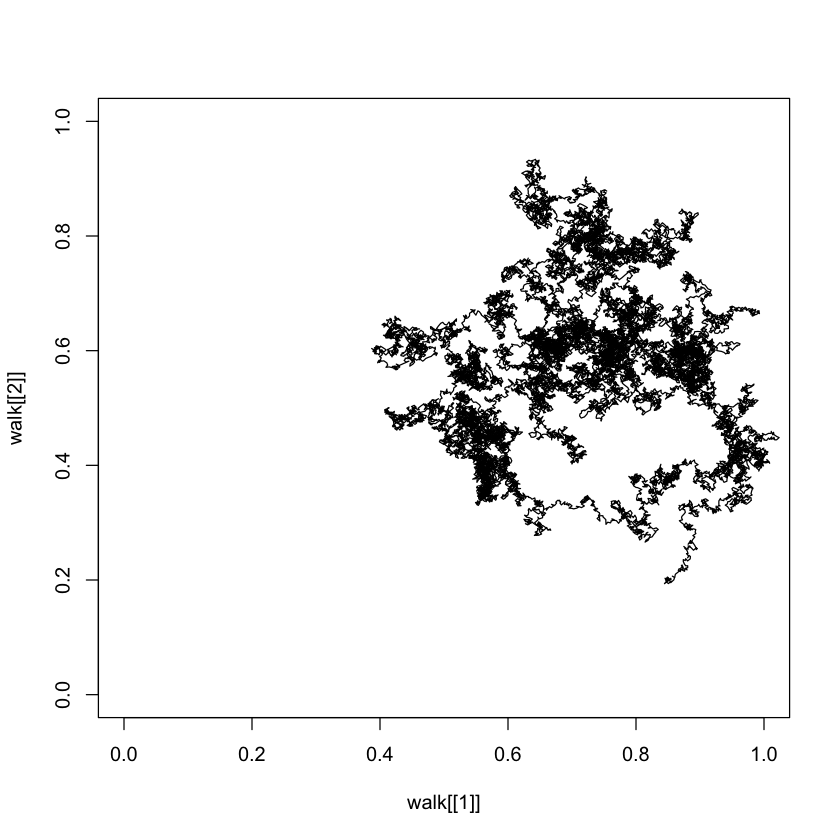

In [133]:
walk <- UnitWalk(0.005,30000)
plot(walk[[1]],walk[[2]], type = 'l', 
    xlim = c(0,1), ylim = c(0,1))

In [148]:
UnitSquare <- function(n_iters) {
    
    x <- c()
    y <- c()
    dist <- c()
        
    for (i in (1:(n_iters))) {
        x[i] <- runif(1,-0.5,0.5)
        y[i] <- runif(1,-0.5,0.5)
        dist[i] <- sqrt(x[i]^(2) + y[i]^(2))
    }
    
    return(data.frame(x,y,dist))

}

In [ ]:
square <- UnitSquare(100000) #run the simulation

#subset the dataframe
in_circle <- subset(square, subset = (dist < 0.5)) #find the points in the circle
out_circle <- subset(square, subset = (dist >= 0.5)) #find the points out of the circle

plot(out_circle$x,out_circle$y, pch = '.',
    xlim = c(-0.5,0.5), ylim = c(-0.5,0.5))
points(in_circle$x,in_circle$y, 
    xlim = c(-0.5,0.5), ylim = c(-0.5,0.5),pch = '.', col = 'blue')

#estimate pi
pi_estimate <- (length(in_circle$x)/(length(out_circle$x) + length(in_circle$x)))*4.0
print(pi_estimate)

 ## b)
 
b. do the same as in (a), except once you are offered a legal point, only move to
that point with a probability given by the Metropolis ratio.\\[5pt]

## c)

c. How does the value of $\epsilon$ affect the estimate of $\pi$ in (a)? Give a brief explanation
of why (b) works but (a) does not.